Farutin Vadim

Homework01

In [2]:
import numpy as np
import operator
import csv

Reading datasets.

In [3]:
def read_spam():
    D = []
    
    with open('./Datasets/spam.csv', newline='') as csv_file:
        dataset_reader = csv.reader(csv_file, delimiter=',')
        next(dataset_reader)
        for row in dataset_reader:
            row = list(map(float, row))
            D.append(np.array([np.array(row[:-1]), row[-1]]))

    return np.array(D)

In [4]:
def read_cancer():
    D = []
    
    with open('./Datasets/cancer.csv', newline='') as csv_file:
        dataset_reader = csv.reader(csv_file, delimiter=',')
        next(dataset_reader)
        for row in dataset_reader:
            D.append(np.array([np.array(list(map(float, row[1:]))), row[0]]))

    return np.array(D)

In [5]:
def read_blobs():
    D = []
    
    with open('./Datasets/blobs.csv', newline='') as csv_file:
        dataset_reader = csv.reader(csv_file, delimiter=',')
        next(dataset_reader)
        for row in dataset_reader:
            row = list(map(float, row))
            D.append(np.array(row))

    return np.array(D)

kNN

Datasets are spam.csv and cancer.csv.

1. (8 points) Implement the kNN algorithm and calculate Leave-one-out error on both datasets for 1 to 10 neighbors.

Hint. You can find the 10 nearest neighbors and then crop it to 9, 8 and so on.

In [6]:
import heapq

def k_neighbors(x, D, k):
    def dist(row):
        return np.linalg.norm(row[0] - x)
    return heapq.nsmallest(k, D, dist)

In [7]:
def kNN(x, D, k, neighbors=None):
    if neighbors is None:
        neighbors = k_neighbors(x, D, k)
    
    label_cnt = dict()
    for value in neighbors:
        label_cnt[value[1]] = label_cnt.get(value[1], 0) + 1
    
    h = max(label_cnt.items(), key=operator.itemgetter(1))[0]
    return h

In [8]:
def LOO(D, K):
    res = np.zeros(K)
    
    for i, row in enumerate(D):
        Di = np.delete(D, i, 0)
        neighbors = k_neighbors(row[0], Di, K)
        for k in range(1, K + 1):
            res[k - 1] += 1 if kNN(row[0], Di, k, neighbors[:k]) != row[1] else 0
    
    res /= len(D)
    return res

In [298]:
K = 10
D = read_spam()
res = LOO(D, K)

print('Leave-one-out error for spam dataset:')
for k in range(1, K + 1):
    print('k: %d error: %f' % (k, res[k - 1]))

Leave-one-out error for spam dataset:
k: 1 error: 0.169528
k: 2 error: 0.169528
k: 3 error: 0.185177
k: 4 error: 0.173441
k: 5 error: 0.185829
k: 6 error: 0.176701
k: 7 error: 0.195827
k: 8 error: 0.182352
k: 9 error: 0.202782
k: 10 error: 0.187133


In [306]:
K = 10
D = read_cancer()
res = LOO(D, K)

print('Leave-one-out error for cancer dataset:')
for k in range(1, K + 1):
    print('k: %d error: %f' % (k, res[k - 1]))

Leave-one-out error for cancer dataset:
k: 1 error: 0.084359
k: 2 error: 0.084359
k: 3 error: 0.073814
k: 4 error: 0.073814
k: 5 error: 0.066784
k: 6 error: 0.070299
k: 7 error: 0.068541
k: 8 error: 0.068541
k: 9 error: 0.066784
k: 10 error: 0.068541


2. (2) Scale all features with MinMax scaler to [0,1] and calculate Leave-one-out error on both datasets for 1 to 10 neighbors.

In [9]:
from sklearn.preprocessing import MinMaxScaler

def min_max_scale(D):
    scaler = MinMaxScaler()
    features = np.array([row[0] for row in D])
    scaled_features = scaler.fit_transform(features)
    scaled_D = np.copy(D)
    for i in range(len(D)):
        scaled_D[i][0] = scaled_features[i]

    return scaled_D

In [12]:
K = 10
D = read_spam()
res = LOO(min_max_scale(D), K)
print('Leave-one-out error for scaled spam dataset:')
print(res)

Leave-one-out error for scaled spam dataset:
[0.087807   0.087807   0.09476201 0.08911106 0.0951967  0.08911106
 0.09932623 0.09063247 0.10193436 0.09693545]


In [10]:
K = 10
D = read_cancer()
res = LOO(min_max_scale(D), K)
print('Leave-one-out error for scaled cancer dataset:')
print(res)

Leave-one-out error for scaled cancer dataset:
[0.04745167 0.04745167 0.02987698 0.02811951 0.03339192 0.03163445
 0.02987698 0.02987698 0.02987698 0.02636204]


Clustering

Dataset is blobs.csv.

The results should be presented as drawn clusters.

3. (2) Implement the k-means algorithm and cluster data point into [2,3,4,5] clusters.

In [10]:
import random

In [66]:
def kMeans(D, k):
    clusters_idx = list(range(k))
    centers = random.sample(list(D), k)
    
    while True:
        def dist_to_x(x):
            return lambda idx: np.linalg.norm(x - centers[idx])
   
        clusters = [min(clusters_idx, key=dist_to_x(x)) for x in D]
        clusters_cnt = np.zeros(len(D))
        old_centers = np.copy(centers)
        centers = np.zeros((k, len(old_centers[0])))
        
        for i in range(len(D)):
            centers[clusters[i]] = np.array(centers[clusters[i]]) + D[i]
            clusters_cnt[clusters[i]] += 1
        
        for i in range(k):
            if clusters_cnt[i] != 0:
                centers[i] /= clusters_cnt[i]
            
        if np.allclose(old_centers, centers):
            break
        
    return np.array(clusters) + 1

In [67]:
import matplotlib.pyplot as plt

colors = ['black', 'blue', 'red', 'green', 'yellow', 'magenta']


def plot_clusters(D, clusters):
    x = [row[0] for row in D]
    y = [row[1] for row in D]
    c = [colors[i % 6] for i in clusters]
    
    plt.scatter(x, y, c=c)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

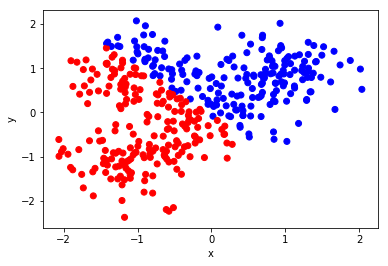

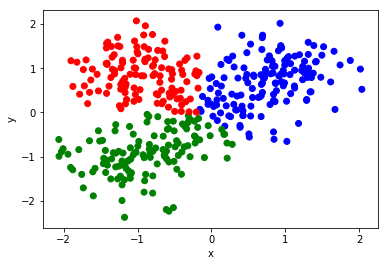

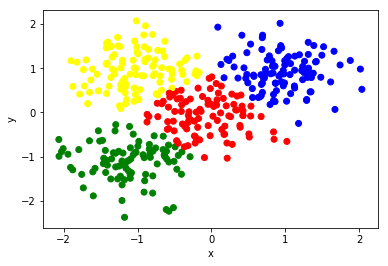

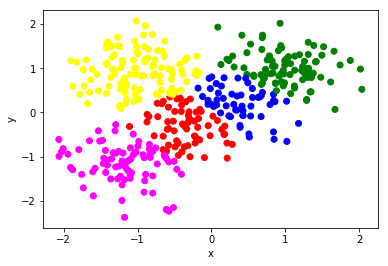

In [70]:
D = read_blobs()

for k in range(2, 6):
    clusters = kMeans(D, k)
    plot_clusters(D, clusters)

4. (2) Implement the DBSCAN algorithm and find parameters for clustering into [2,3,4,5] clusters.

In [13]:
def DBSCAN(D, m, eps):
    dataset_range = range(len(D))
    clusters_cnt = 0
    clusters = np.zeros(len(D), dtype=int)
    
    for i in dataset_range:
        if clusters[i] != 0:
            continue
            
        neighbors = []
        for j in dataset_range:
            if i != j and np.linalg.norm(D[i] - D[j]) < eps:
                neighbors.append(j)

        if len(neighbors) < m:
            continue
        
        clusters_cnt += 1
        clusters[i] = clusters_cnt
        
        while True:
            next_neighbors = []
            
            for j in neighbors:
                if clusters[j] != 0:
                    continue
                
                clusters[j] = clusters_cnt
                
                current_neighbors = []
                for k in dataset_range:
                    if j != k and np.linalg.norm(D[j] - D[k]) < eps:
                        current_neighbors.append(k)
        
                if len(current_neighbors) >= m:
                    next_neighbors.extend(current_neighbors)
 
            if len(next_neighbors) == 0:
                break
                
            neighbors = np.copy(next_neighbors)
        
    return np.array(clusters)

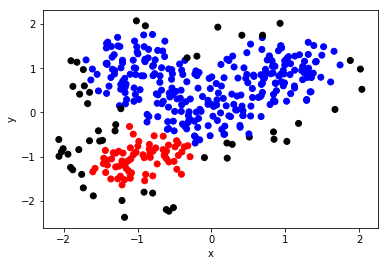

In [58]:
D = read_blobs()
clusters = DBSCAN(D, 40, 0.5)
plot_clusters(D, clusters)

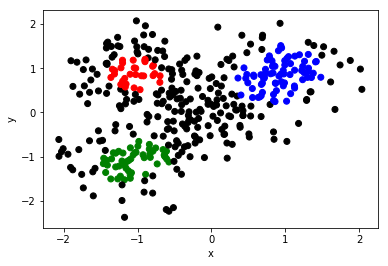

In [103]:
D = read_blobs()
clusters = DBSCAN(D, 30, 0.38)
plot_clusters(D, clusters)

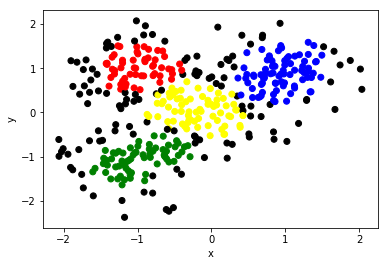

In [79]:
D = read_blobs()
clusters = DBSCAN(D, 30, 0.4)
plot_clusters(D, clusters)

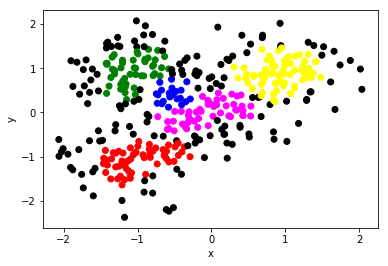

In [149]:
D = read_blobs()
clusters = DBSCAN(D, 12, 0.25)
plot_clusters(D, clusters)

5. (3) Implement the Agglomerative Clustering and output the clustering into [2,3,4,5] clusters.

In [14]:
def dist_btw_clusters(D, a, b):
    return max([np.linalg.norm(D[i] - D[j]) for i in a for j in b])

def agglomerative_clustering(D, k):
    clusters = list([[i] for i in range(len(D))])
    distances = np.zeros(len(D))
    
    while len(clusters) > k:
        merge_idx = []
        merge_min_dist = None
        
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                new_distances = np.delete(distances, [i, j], 0)
                merge_dist = max([dist_btw_clusters(D, clusters[i], clusters[j]), distances[i], distances[j]])               
                new_distances = np.append(new_distances, merge_dist)
                merge_cur_dist = max(new_distances)
                
                if merge_min_dist is None or merge_cur_dist < merge_min_dist:
                    merge_min_dist = merge_cur_dist
                    merge_idx = [i, j]

        distances = np.delete(distances, merge_idx, 0)
        distances = np.append(distances, merge_min_dist)
        clusters.append(np.append(clusters[merge_idx[0]], clusters[merge_idx[1]]))
        clusters = np.delete(np.array(clusters), merge_idx, 0)
        clusters = clusters.tolist()
        
    ans = np.zeros(len(D), dtype=int)
    for i in range(len(clusters)):
        for j in clusters[i]:
            ans[j] = i
            
    return ans

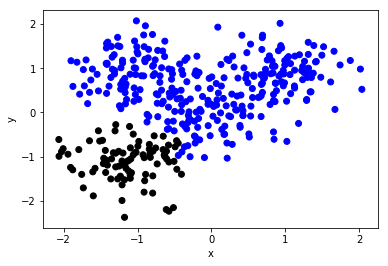

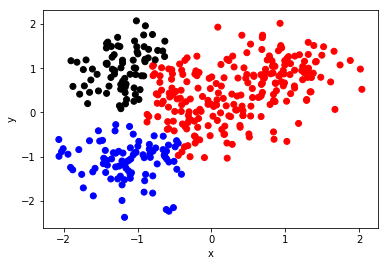

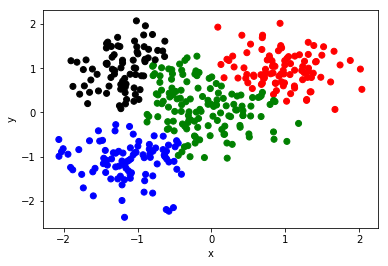

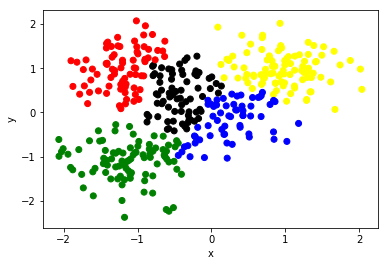

In [186]:
D = read_blobs()

for k in range(2, 6):
    clusters = agglomerative_clustering(D, k)
    plot_clusters(D, clusters)

Dataset is cancer.csv.

6. (2) Cluster datapoints into [2,3,5,10] clusters with k-Means and calculate the Purity metric.


In [15]:
def purity(D, clusters, k):
    Y = np.array([row[1] for row in D])
    ans = 0
    
    for i in range(1, k + 1):
        cnt = dict()
        for y in Y[clusters == i]:
            cnt[y] = cnt.get(y, 0) + 1
        if len(cnt) != 0:
            ans += max(cnt.items(), key=operator.itemgetter(1))[1]
        
    ans /= len(D)
    return ans

In [71]:
D = read_cancer()
X = [row[0] for row in D]

for k in [2, 3, 5, 10]:
    clusters = kMeans(X, k)
    print(purity(D, clusters, k))

0.8541300527240774
0.8875219683655536
0.8910369068541301
0.9103690685413005


Rules and curves

Datasets are spam.csv and cancer.csv.

7. (2) Calculate ROC-AUC for threshold rules for every feature for both datasets. Draw ROC curves for the best three in both.


In [36]:
from sklearn import metrics

def best_roc_curves(D, k, pos_label):
    X = [row[0] for row in D]
    Y = [row[1] for row in D]
    scores = [metrics.roc_auc_score(Y, [row[i] for row in X]) for i in range(len(X[0]))]
    sorted_idx = np.argsort(scores)
    best_scores_idx = sorted_idx[-3:]
    curves = [metrics.roc_curve(Y, [row[i] for row in X], pos_label=pos_label) for i in best_scores_idx]
    
    return curves

In [37]:
def plot_curve(curve):
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.plot(curve[0], curve[1])
    plt.plot([0, 1], [0, 1])
    plt.show()

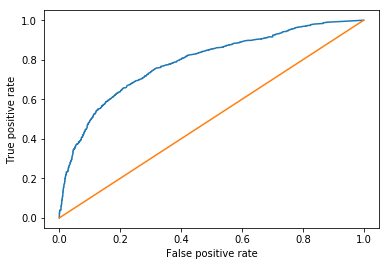

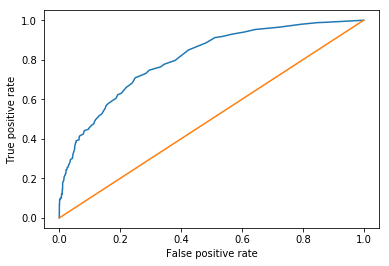

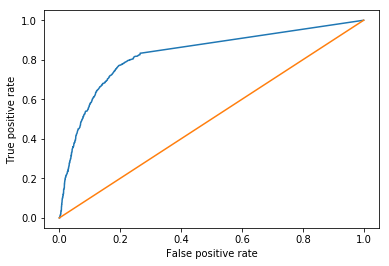

In [39]:
D = read_spam()
roc_curves = best_roc_curves(D, 3, 1.0)
for curve in roc_curves:
    plot_curve(curve)

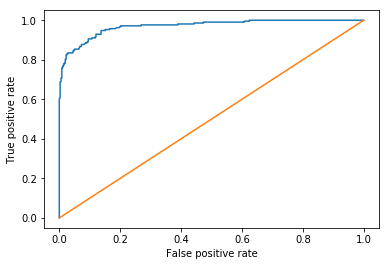

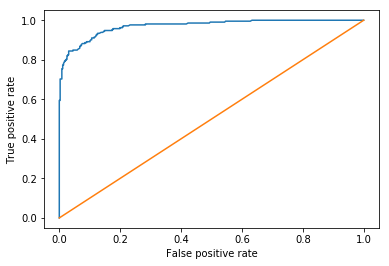

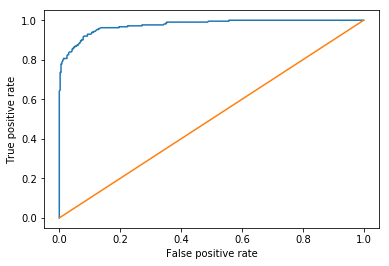

In [41]:
D = read_cancer()
roc_curves = best_roc_curves(D, 3, 'M')
for curve in roc_curves:
    plot_curve(curve)

Validation

Datasets are spam.csv and cancer.csv.

8. (1) Split the dataset into training and validation datasets (80%/20%). Print out the proportions of classes in all datasets.


In [49]:
from sklearn.model_selection import train_test_split

def split_dataset(D, train_size):
    X = [row[0] for row in D]
    Y = [row[1] for row in D]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size)
    D_train = np.array([[x_row, y_row] for x_row, y_row in zip(X_train, Y_train)])
    D_test = np.array([[x_row, y_row] for x_row, y_row in zip(X_test, Y_test)])
    
    return D_train, D_test

In [61]:
def dataset_classes_proportion(D):
    classes = dict()
    for row in D:
        classes[row[1]] = classes.get(row[1], 0) + 1
    classes = {k: v / len(D) for k, v in classes.items()}    
    
    return classes

In [62]:
D = read_spam()
D_train, D_test = split_dataset(D, 0.8)
print(dataset_classes_proportion(D_train))
print(dataset_classes_proportion(D_test))

{0.0: 0.6043478260869565, 1.0: 0.39565217391304347}
{0.0: 0.6123778501628665, 1.0: 0.38762214983713356}


In [65]:
D = read_cancer()
D_train, D_test = split_dataset(D, 0.8)
print(dataset_classes_proportion(D_train))
print(dataset_classes_proportion(D_test))

{'B': 0.6373626373626373, 'M': 0.3626373626373626}
{'B': 0.5877192982456141, 'M': 0.41228070175438597}


Trees

Datasets are spam.csv and cancer.csv.

 9. (5) Implement a tree algorithm with Gini Impurity criterion. Find the best depth (from 1 to 10) on the validation dataset. Draw ROC curves for thresholds on class probabilities.

In [281]:
def gini_impurity(X, Y):
    size = len(X)
    ans = 0.0
    
    for y in np.unique(Y):
        p = len(X[Y == y])
        ans += p * (1 - p) / size ** 2
    
    return ans

In [282]:
def split(X, feature, threshold):
    values = [row[feature] for row in X]
    left_idx = np.array(values < threshold)
    right_idx = np.array(values >= threshold)
    
    return left_idx, right_idx

In [283]:
def find_max_ig(X, Y):
    max_ig = None
    max_feature = 0
    max_threshold = 0
    
    for feature in range(len(X[0])):
        for row in X:
            threshold = row[feature]
            left_idx, right_idx = split(X, feature, threshold)
            ig = -len(X[left_idx]) * gini_impurity(X[left_idx], Y[left_idx]) \
                 -len(X[right_idx]) * gini_impurity(X[right_idx], Y[right_idx])
            
            if max_ig is None or ig > max_ig:
                max_ig = ig
                max_feature = feature
                max_threshold = threshold
    
    return feature, threshold

In [284]:
def find_majority_class(Y):
    cnt = dict()
    for y in Y:
        cnt[y] = cnt.get(y, 0) + 1
    majority = max(cnt.items(), key=operator.itemgetter(1))[0]
    
    return majority

In [285]:
class Node:
    def __init__(self, left, right, majority=None, feature=None, threshold=None):
        self.left = left
        self.right = right
        self.majority = majority
        self.feature = feature
        self.threshold = threshold

In [300]:
def build_tree(X, Y, depth):
    majority = find_majority_class(Y)
    
    if len(np.unique(Y)) == 1 or depth == 0:
        return Node(None, None, majority=majority)

    feature, threshold = find_max_ig(X, Y)
    left_idx, right_idx = split(X, feature, threshold)

    if len(Y[left_idx]) == 0 or len(Y[right_idx]) == 0:
        return Node(None, None, majority=majority)        
    
    left = build_tree(X[left_idx], Y[left_idx], depth - 1)
    right = build_tree(X[right_idx], Y[right_idx], depth - 1)
    root = Node(left, right, majority=majority, feature=feature, threshold=threshold)
    
    return root

In [301]:
def tree_classifier(root, depth, x):
    node = root
    
    while node.left is not None and depth >= 0:
        node = node.left if x[node.feature] < node.threshold else node.right
        depth -= 1
    
    return node.majority

In [304]:
def find_best_depth(D, max_depth):
    D_train, D_validate = split_dataset(D, 0.8)
    X = np.array([row[0] for row in D_train])
    Y = np.array([row[1] for row in D_train])
    root = build_tree(X, Y, max_depth)
    
    max_match = 0
    opt_depth = 0
    
    for depth in range(1, max_depth + 1):
        clusters = [tree_classifier(root, depth, row[0]) for row in D_validate]
        match = 0
        for row, cluster in zip(D_validate, clusters):
            if row[1] == cluster:
                match += 1
        if match > max_match:
            max_match = match
            opt_depth = depth
    
    return opt_depth

In [295]:
D = read_spam()
print(find_best_depth(D, 10))

In [307]:
D = read_cancer()
print(find_best_depth(D, 10))

1
